In [58]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib as mpl

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


mpl.rcParams['figure.figsize'] =(10,8)
mpl.rcParams['axes.grid'] =False

In [2]:
df=pd.read_csv(r"D:\CS\Machine Learning\Advanced-Time-Series-Prediction\energydata_complete.csv")

df.head(20)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [3]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [ ]:
## changing date and date into date time format

df['date'] = pd.to_datetime( df['date'], infer_datetime_format=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19776\1198856128.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime( df['date'], infer_datetime_format=True)


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

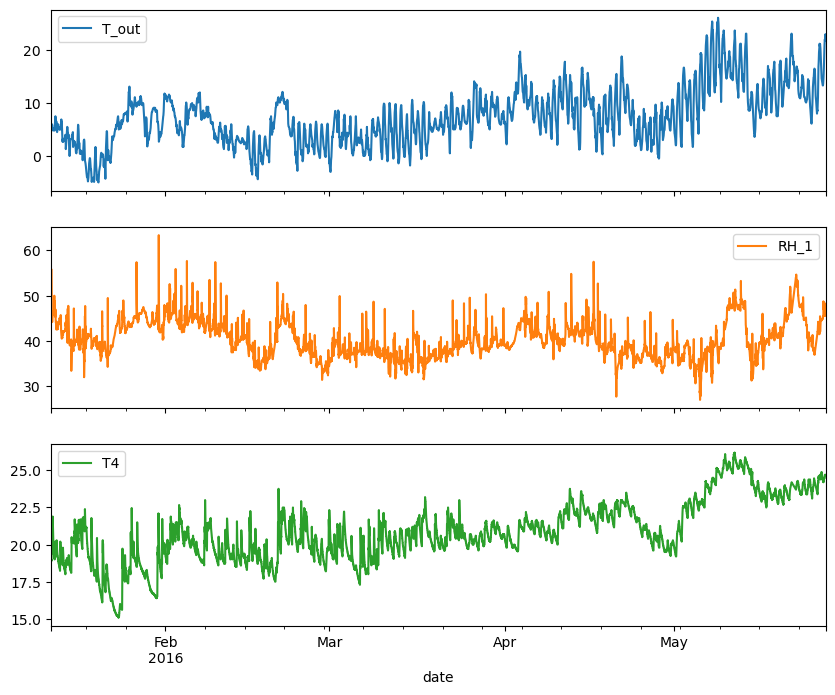

In [5]:
df.set_index('date')[['T_out', 'RH_1', 'T4']].plot(subplots=True)
## setting index and plotting wrt date

In [6]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [12]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop(columns='date'))

In [13]:
df_scaled.shape

(19735, 28)

In [14]:
X= df_scaled[:, 1:]
y =df_scaled[:, 0]

In [15]:
X.shape

(19735, 27)

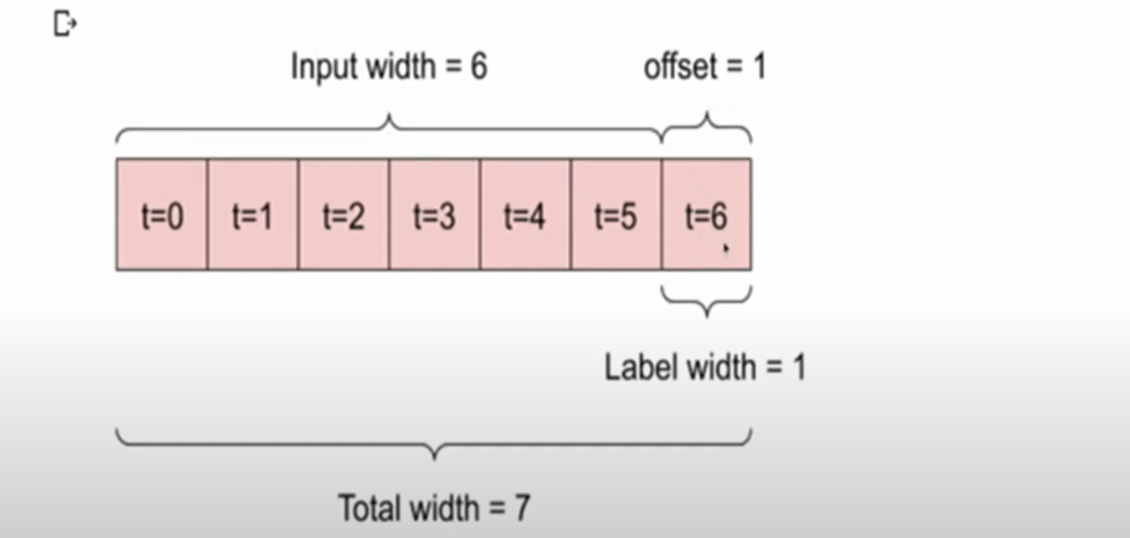

### time series generation

input width = 6 window, 

want to forcast for 1 value = 1

sampling rate =1 continuous data, 

batch_size =1 need higher batch size 64 

it will give 7th value the of the label as the label for the specific Timeseriese window 
stride  =1 is shifting the window normally if want skip start from stride=2

In [29]:
ts_generator = TimeseriesGenerator(X, y , length=6, sampling_rate=1, batch_size=1, stride=1)
ts_generator

In [ ]:
# ts_generator[0]
# ts_generator[1]


(array([[[0.42857143, 0.32734952, 0.54132648, 0.22534529, 0.68213984,
          0.21518777, 0.74887054, 0.35135135, 0.78243705, 0.17550565,
          0.38169106, 0.37544268, 0.83987192, 0.17059378, 0.65106383,
          0.17332926, 0.66015536, 0.22650017, 0.67853201, 0.36923901,
          0.1       , 0.89473684, 0.47619048, 0.89487179, 0.53393665,
          0.37208289, 0.37208289],
         [0.42857143, 0.32734952, 0.53050179, 0.22534529, 0.67944512,
          0.21518777, 0.7555694 , 0.34474474, 0.77806231, 0.17550565,
          0.38003709, 0.36748654, 0.83070442, 0.17059378, 0.6465721 ,
          0.17332926, 0.65558602, 0.21956296, 0.67604857, 0.36548767,
          0.10232558, 0.89473684, 0.45238095, 0.83589744, 0.52941176,
          0.57284766, 0.57284766],
         [0.57142857, 0.32734952, 0.52408036, 0.22534529, 0.6784141 ,
          0.21518777, 0.75868515, 0.34144144, 0.77094893, 0.17550565,
          0.38003709, 0.36379954, 0.83340074, 0.1643104 , 0.64148936,
          0.16417455

In [30]:
len(ts_generator)

19729

### multiple output prediction -- If we need to predict more data not one data pre processing will be different

In [ ]:

# multi_target = pd.concat([df['Appliances'], df['Appliances'].shift(-1), df['Appliances'].shift(-2)], axis=1 ).dropna().to_numpy()
# print("shape of the multiple target",multi_target.shape)
# print("shape X",X.shape)

# ts_gen_multi = TimeseriesGenerator(X[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6) ## -2 is las two data points have been dropped due shifting of labels 
# ts_gen_multi[0]

### Training

In [33]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=123, shuffle=False)

win_length =720 ## 5days 10mins
batch_size =32
num_features =27

train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

# train_generator[0][0].shape ## 32 batch size, 720 window length

In [34]:

model =tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

model.summary()

c:\Users\Lenovo\miniconda3\envs\CV-env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Lenovo\miniconda3\envs\CV-env\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 720, 128)       │        79,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 720, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 720, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 720, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 720, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,929 (1019.25 KB)

 Trainable params: 260,929 (1019.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
early_stopping =tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

model.compile(optimizer='adam',loss='mse',  metrics=['accuracy'])


In [36]:
history = model.fit(train_generator, epochs =50, validation_data= test_generator, shuffle= False, callbacks = [early_stopping] )

Epoch 1/50


c:\Users\Lenovo\miniconda3\envs\CV-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  9/471 ━━━━━━━━━━━━━━━━━━━━ 8:18 1s/step - accuracy: 0.0000e+00 - loss: 0.0750

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_generator, verbose = 0)

In [ ]:
predictions = model.predict(test_generator)

In [ ]:
predictions.shape[0]